# Data preprocessing

### Imports

In [ ]:
import matplotlib.pyplot as plt

from jellyfish_classif.pipeline.dataset import JellyfishDataset
from jellyfish_classif.pipeline.utils import compute_class_weights


### Dataset creation

In [2]:
dataset = JellyfishDataset("/app/data/images")

# Step 1 : split
X_train, X_val, X_test, y_train, y_val, y_test = dataset.split(
    train_ratio=0.75, val_ratio=0.15, test_ratio=0.10
)

# Step 2 : create tf.data.Dataset
train_ds = dataset.to_tf_dataset(X_train, y_train, augment=True)
val_ds   = dataset.to_tf_dataset(X_val, y_val)
test_ds  = dataset.to_tf_dataset(X_test, y_test)


I0000 00:00:1761737880.741446    1836 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2063 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [3]:
# Compute class weights
class_weights = compute_class_weights(y_train)

print("Class weights:", class_weights)

Class weights: {0: 0.6109422492401215, 1: 1.005, 2: 2.0406091370558377, 3: 0.903370786516854, 4: 1.2967741935483872}


In [4]:
print(f"Train set : {len(train_ds)}")
print(f"Val set : {len(val_ds)}")
print(f"Test set : {len(test_ds)}")

Train set : 126
Val set : 26
Test set : 17


In [5]:
for images, labels in train_ds.take(1):
    print(f"Images shape: {images.shape}")
    print(f"Labels shape: {labels.shape}")
    print("Labels:", labels.numpy())


Images shape: (16, 224, 224, 3)
Labels shape: (16,)
Labels: [2 3 4 3 0 0 0 4 0 3 3 3 0 1 0 0]


### Visualize dataset

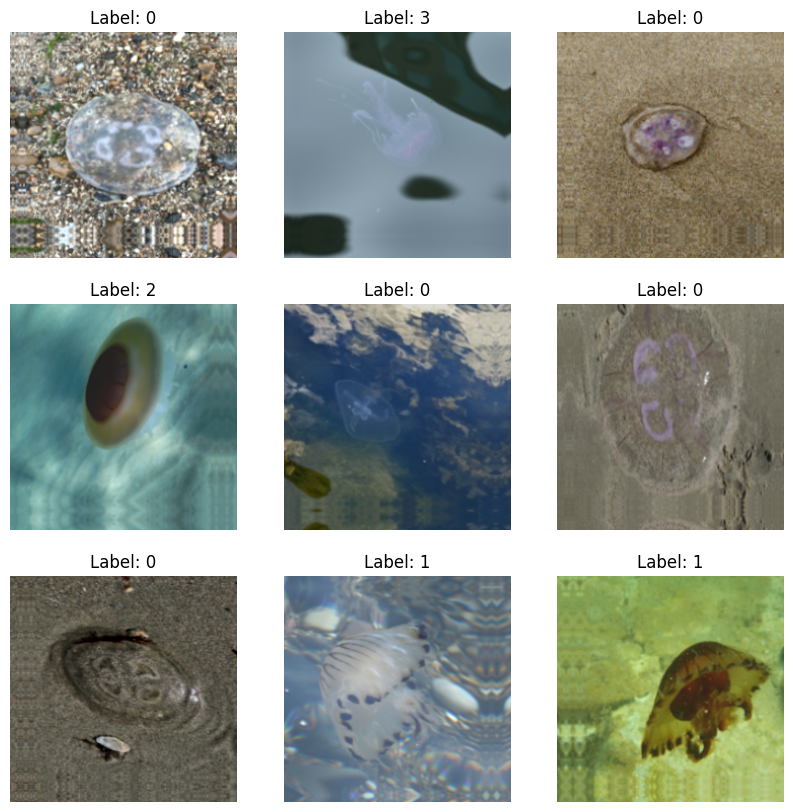

In [15]:
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10,10))
    for i in range(min(9, images.shape[0])):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
    plt.show()


In [20]:
print("Label map:")
label_map = dataset.label_map
for class_name, class_index in label_map.items():
    print(f"{class_index}: {class_name}")


Label map:
0: Aurelia_aurita
1: Chrysaora_hysoscella
2: Cotylorhiza_tuberculata
3: Pelagia_noctiluca
4: Rhizostoma_pulmo
